<a href="https://colab.research.google.com/github/purvilmehta06/Deep-Learning/blob/master/Lab%204/LabAssignment4_201701073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Deep Learning


*   Lab Manual: [Manual Lab 4](https://github.com/purvilmehta06/Deep-Learning/blob/master/Lab%204/Lab_Assignment_4.pdf)
*   Author: Purvil Mehta
*   Id : 201701073
*   Github Link : [Deep Learning Course Lab Work Repo](https://github.com/purvilmehta06/Deep-Learning)

# Importing Libraries

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras import regularizers

# Loading Dataset

In [24]:
# load training dataset
x_train = pd.read_csv("drive/My Drive/Colab Notebooks/Lab 3 Data/x_train.csv")
y_train = pd.read_csv("drive/My Drive/Colab Notebooks/Lab 3 Data/y_train.csv")

x_train = np.array(x_train)
y_train = np.array(y_train)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)

#Load testing dataset

x_test = pd.read_csv("drive/My Drive/Colab Notebooks/Lab 3 Data/x_test.csv")
y_test = pd.read_csv("drive/My Drive/Colab Notebooks/Lab 3 Data/y_test.csv")

x_test = np.array(x_test)
y_test = np.array(y_test)

sc = StandardScaler()
x_test = sc.fit_transform(x_test)

#loading validation dataset
x_val = pd.read_csv("drive/My Drive/Colab Notebooks/Lab 3 Data/x_valid.csv")
y_val = pd.read_csv("drive/My Drive/Colab Notebooks/Lab 3 Data/y_valid.csv")

x_val = np.array(x_val)
y_val = np.array(y_val)

sc = StandardScaler()
x_val = sc.fit_transform(x_val)

# Modelwise General Implementation 

In [3]:
def model1():
  model = Sequential()
  mse = []
  model.add(Dense(5,input_dim=4, activation='relu'))
  model.add(Dense(1, activation='relu'))
  model.get_layer(index=0)
  return model

In [4]:
def model2():
  model = Sequential()
  mse = []
  model.add(Dense(10,input_dim=4, activation='relu'))
  model.add(Dense(1, activation='relu'))
  model.get_layer(index=0)
  return model

In [5]:
def model3():
  model = Sequential()
  model.add(Dense(5,input_dim=4, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(5, activation='relu'))
  model.add(Dense(1, activation='relu'))
  model.get_layer(index=0)
  return model

# Que 1

## Model 1

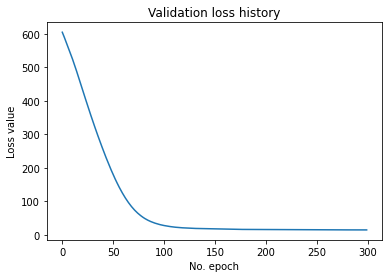

Training MSE: 14.75821590423584
Testing MSE : 15.300559043884277


In [ ]:
model = model1()
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history_model1 = model.fit(x_train, y_train, epochs=300, batch_size=8,verbose=0)

plt.plot(history_model1.history['mse'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

mse_train = model.evaluate(x_train,y_train,verbose=0)[1]
mse_test = model.evaluate(x_test,y_test,verbose=0)[1]

print("Training MSE: {}".format(mse_train))
print("Testing MSE : {}".format(mse_test))

## Model 2

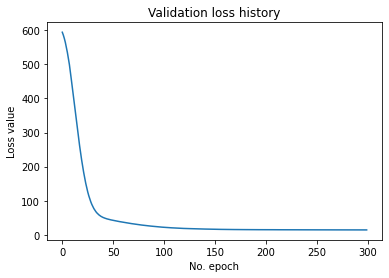

Training MSE: 14.411979675292969
Testing MSE : 14.726624488830566


In [ ]:
model = model2()

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history_model2 = model.fit(x_train, y_train, epochs=300, batch_size=8,verbose=0)

plt.plot(history_model2.history['mse'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

mse_train = model.evaluate(x_train,y_train,verbose=0)[1]
mse_test = model.evaluate(x_test,y_test,verbose=0)[1]

print("Training MSE: {}".format(mse_train))
print("Testing MSE : {}".format(mse_test))

## Model 3

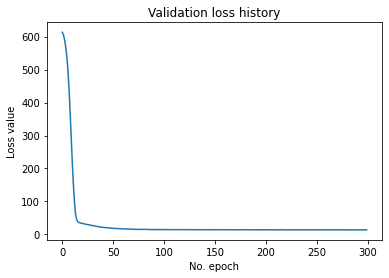

Training MSE: 13.657844543457031
Testing MSE : 14.955949783325195


In [ ]:
model = model3()
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history_model3 = model.fit(x_train, y_train, epochs=300, batch_size=8,verbose=0)

plt.plot(history_model3.history['mse'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

mse_train = model.evaluate(x_train,y_train,verbose=0)[1]
mse_test = model.evaluate(x_test,y_test,verbose=0)[1]

print("Training MSE: {}".format(mse_train))
print("Testing MSE : {}".format(mse_test))

# Que 2

## General KFOLD cross entropy function

In [ ]:
def k_Fold(epochs,num_folds,x_train,x_val,y_train,y_val,modelNo):
  
  lossPerFold = []
  final_mse = []
  
  inputs = np.concatenate((x_train, x_val), axis=0)[2:,:]
  targets = np.concatenate((y_train, y_val), axis=0)[2:]

  # shuffler = np.random.permutation(len(inputs))
  # inputs = inputs[shuffler]
  # targets = targets[shuffler]
  kfold = KFold(n_splits=num_folds, shuffle=True)

  # K-fold Cross Validation model evaluation
  fold_no = 1
  for train, test in kfold.split(inputs, targets):
    mse = []
    if (modelNo == 1):
      model = model1()
    elif (modelNo == 2):
      model = model2()
    else:
      model = model3()
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    #for k in range(epochs):
    history_model1 = model.fit(inputs[train], targets[train], epochs=epochs,verbose=0,batch_size=10,validation_data = (inputs[test],targets[test]))
    #scores = model.evaluate(inputs[test], targets[test], verbose=0)
    #mse.append(scores[1])
      
    # Generate generalization metrics
    
    final_mse.append(history_model1.history['val_mse']);
    lossPerFold.append(final_mse[fold_no-1][epochs-1])
    print(f'[{modelNo}] Score for fold {fold_no}: {model.metrics_names[1]} of {final_mse[fold_no-1][epochs-1]}')
    # Increase fold number
    fold_no = fold_no + 1

  
  # == Provide average scores ==
  print('[{}] Average scores for all folds: {}'.format(modelNo,np.mean(lossPerFold)))
  return final_mse

## Model 1

In [ ]:
epochs_model1 = 300
epochs_model2 = 300
epochs_model3 = 300
folds = 10 

# Last argument stands for the model number
ans1 = k_Fold(epochs_model1,folds,x_train,x_val,y_train,y_val,1); 

[1] Score for fold 1: mse of 17.299606323242188
[1] Score for fold 2: mse of 18.185937881469727
[1] Score for fold 3: mse of 11.583671569824219
[1] Score for fold 4: mse of 13.402042388916016
[1] Score for fold 5: mse of 31.521080017089844
[1] Score for fold 6: mse of 10.645840644836426
[1] Score for fold 7: mse of 16.65315055847168
[1] Score for fold 8: mse of 16.76543617248535
[1] Score for fold 9: mse of 11.134197235107422
[1] Score for fold 10: mse of 13.324420928955078
[1] Average scores for all folds: 16.051538372039794


## Model 2

In [ ]:
ans2 = k_Fold(epochs_model2,folds,x_train,x_val,y_train,y_val,2); 

[2] Score for fold 1: mse of 13.347832679748535
[2] Score for fold 2: mse of 12.78521728515625
[2] Score for fold 3: mse of 12.212196350097656
[2] Score for fold 4: mse of 6.805118083953857
[2] Score for fold 5: mse of 21.046159744262695
[2] Score for fold 6: mse of 9.850756645202637
[2] Score for fold 7: mse of 20.81561851501465
[2] Score for fold 8: mse of 14.825030326843262
[2] Score for fold 9: mse of 17.322650909423828
[2] Score for fold 10: mse of 30.119583129882812
[2] Average scores for all folds: 15.913016366958619


## Model 3

In [ ]:
ans3 = k_Fold(300,10,x_train,x_val,y_train,y_val,3); 

[3] Score for fold 1: mse of 15.459888458251953
[3] Score for fold 2: mse of 13.214339256286621
[3] Score for fold 3: mse of 19.502769470214844
[3] Score for fold 4: mse of 27.03596305847168
[3] Score for fold 5: mse of 6.783481121063232
[3] Score for fold 6: mse of 10.587632179260254
[3] Score for fold 7: mse of 15.553061485290527
[3] Score for fold 8: mse of 7.312789440155029
[3] Score for fold 9: mse of 12.318994522094727
[3] Score for fold 10: mse of 32.225059509277344
[3] Average scores for all folds: 15.99939785003662


## Collecing Result and Plot

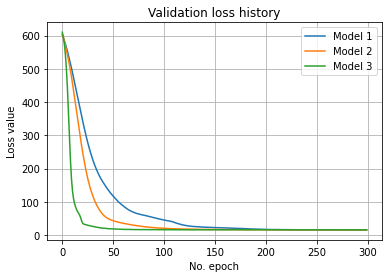

In [ ]:
plt.grid()
plt.plot(np.mean(ans1, axis=0))
plt.plot(np.mean(ans2, axis=0))
plt.plot(np.mean(ans3, axis=0))
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(['Model 1','Model 2','Model 3'])
plt.show()

# Que 3


## Model 1

In [10]:
from tensorflow.python.keras import regularizers
lemda = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]
mse_train = []
mse_test = []
num_folds = 10
epochs = 100

for i in range(len(lemda)):

  inputs = np.concatenate((x_train, x_val), axis=0)[2:,:]
  targets = np.concatenate((y_train, y_val), axis=0)[2:]
  kfold = KFold(n_splits=num_folds, shuffle=True)
  fold_no = 1
  for train, test in kfold.split(inputs, targets):
    model = Sequential()
    model.add(Dense(5,input_dim=4, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    print('\r',fold_no,end='')
    model.add(Dense(1, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    model.get_layer(index=0)
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    history_model1 = model.fit(inputs[train], targets[train], epochs=epochs,verbose=0,batch_size=10,validation_data = (inputs[test],targets[test]))    
    fold_no = fold_no + 1


  mse_train.append(model.evaluate(x_train,y_train,verbose=0)[1])
  mse_test.append(model.evaluate(x_test,y_test,verbose=0)[1])

  print("Training MSE: {}".format(mse_train[i]))
  print("Testing MSE : {}".format(mse_test[i]))

 10Training MSE: 18.9089298248291
Testing MSE : 18.441234588623047
 10Training MSE: 16.623912811279297
Testing MSE : 17.90229034423828
 10Training MSE: 20.063823699951172
Testing MSE : 21.75527572631836
 10Training MSE: 27.696670532226562
Testing MSE : 33.80617904663086
 10Training MSE: 28.604949951171875
Testing MSE : 35.074501037597656
 10Training MSE: 25.936994552612305
Testing MSE : 31.20791244506836
 10Training MSE: 17.28097152709961
Testing MSE : 18.26819610595703


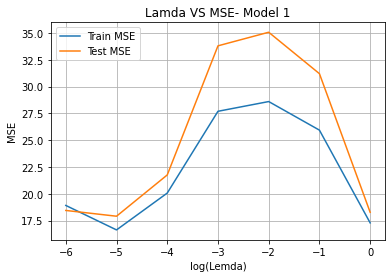

In [12]:
plt.grid()
plt.plot(np.log10(lemda),mse_train)
plt.plot(np.log10(lemda),mse_test)
plt.title('Lamda VS MSE- Model 1')
plt.ylabel('MSE')
plt.xlabel('log(Lemda)')
plt.legend(['Train MSE','Test MSE'])
plt.show()

### Calculating epochs vs MSE for best alpha 

In [30]:
index = np.argmin(mse_test)
mse_train = []
mse_test = []
num_folds = 10
epochs = 100
final_mse = []
inputs = np.concatenate((x_train, x_val), axis=0)[2:,:]
targets = np.concatenate((y_train, y_val), axis=0)[2:]
kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = Sequential()
  model.add(Dense(5,input_dim=4, activation='relu',kernel_regularizer=regularizers.l2(lemda[index])))
  model.add(Dense(1, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
  model.get_layer(index=0)
  model.compile(loss='mse', optimizer='adam', metrics=['mse'])
  history_model1 = model.fit(inputs[train], targets[train], epochs=epochs,verbose=0,batch_size=10,validation_data = (inputs[test],targets[test]))    

  final_mse.append(history_model1.history['val_mse']);
  print(f'Score for fold {fold_no}: {final_mse[fold_no-1][epochs-1]}')
  # Increase fold number
  fold_no = fold_no + 1

ans1 = final_mse

Score for fold 1: 30.621641159057617
Score for fold 2: 23.300430297851562
Score for fold 3: 20.233516693115234
Score for fold 4: 15.104082107543945
Score for fold 5: 35.00912857055664
Score for fold 6: 35.60233688354492
Score for fold 7: 19.395957946777344
Score for fold 8: 89.67477416992188
Score for fold 9: 115.77875518798828
Score for fold 10: 26.50664520263672


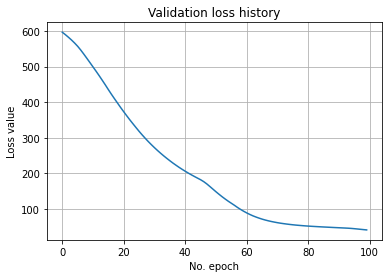

In [31]:
plt.grid()
plt.plot(np.mean(ans1, axis=0))
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

## Model 2

In [33]:
lemda = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]
mse_train = []
mse_test = []
num_folds = 10
epochs = 100

for i in range(len(lemda)):

  inputs = np.concatenate((x_train, x_val), axis=0)[2:,:]
  targets = np.concatenate((y_train, y_val), axis=0)[2:]
  kfold = KFold(n_splits=num_folds, shuffle=True)
  fold_no = 1
  for train, test in kfold.split(inputs, targets):
    model = Sequential()
    model.add(Dense(10,input_dim=4, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    print('\r',fold_no,end='')
    model.add(Dense(1, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    model.get_layer(index=0)
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    history_model1 = model.fit(inputs[train], targets[train], epochs=epochs,verbose=0,batch_size=10,validation_data = (inputs[test],targets[test]))    
    fold_no = fold_no + 1


  mse_train.append(model.evaluate(x_train,y_train,verbose=0)[1])
  mse_test.append(model.evaluate(x_test,y_test,verbose=0)[1])

  print("Training MSE: {}".format(mse_train[i]))
  print("Testing MSE : {}".format(mse_test[i]))

 10Training MSE: 18.633506774902344
Testing MSE : 20.45835304260254
 10Training MSE: 23.872011184692383
Testing MSE : 28.9536190032959
 10Training MSE: 18.39542579650879
Testing MSE : 21.335771560668945
 10Training MSE: 18.090158462524414
Testing MSE : 21.180620193481445
 10Training MSE: 16.416433334350586
Testing MSE : 17.27387809753418
 10Training MSE: 18.08580207824707
Testing MSE : 19.599939346313477
 10Training MSE: 17.783897399902344
Testing MSE : 17.45583152770996


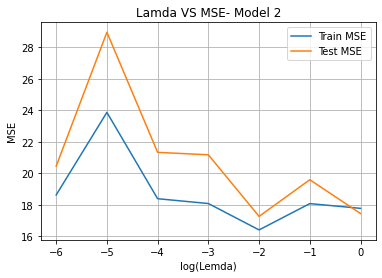

In [34]:
plt.grid()
plt.plot(np.log10(lemda),mse_train)
plt.plot(np.log10(lemda),mse_test)
plt.title('Lamda VS MSE- Model 2')
plt.ylabel('MSE')
plt.xlabel('log(Lemda)')
plt.legend(['Train MSE','Test MSE'])
plt.show()

### Calculating epochs vs MSE for best alpha 

In [35]:
index = np.argmin(mse_test)
mse_train = []
mse_test = []
num_folds = 10
epochs = 100
final_mse = []
inputs = np.concatenate((x_train, x_val), axis=0)[2:,:]
targets = np.concatenate((y_train, y_val), axis=0)[2:]
kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = Sequential()
  model.add(Dense(10,input_dim=4, activation='relu',kernel_regularizer=regularizers.l2(lemda[index])))
  model.add(Dense(1, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
  model.get_layer(index=0)
  model.compile(loss='mse', optimizer='adam', metrics=['mse'])
  history_model1 = model.fit(inputs[train], targets[train], epochs=epochs,verbose=0,batch_size=10,validation_data = (inputs[test],targets[test]))    

  final_mse.append(history_model1.history['val_mse']);
  print(f'Score for fold {fold_no}: {final_mse[fold_no-1][epochs-1]}')
  # Increase fold number
  fold_no = fold_no + 1

ans2 = final_mse

Score for fold 1: 36.262611389160156
Score for fold 2: 19.798507690429688
Score for fold 3: 10.560051918029785
Score for fold 4: 23.893131256103516
Score for fold 5: 18.71951675415039
Score for fold 6: 16.43941307067871
Score for fold 7: 61.450984954833984
Score for fold 8: 21.590442657470703
Score for fold 9: 19.913915634155273
Score for fold 10: 17.469131469726562


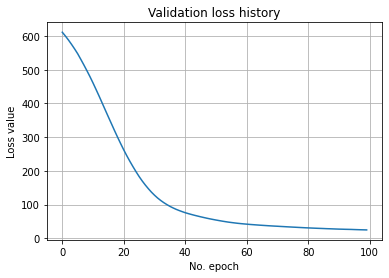

In [36]:
plt.grid()
plt.plot(np.mean(ans2, axis=0))
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

## Model 3

In [9]:
lemda = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]
mse_train = []
mse_test = []
num_folds = 10
epochs = 200

for i in range(len(lemda)):

  inputs = np.concatenate((x_train, x_val), axis=0)[2:,:]
  targets = np.concatenate((y_train, y_val), axis=0)[2:]
  kfold = KFold(n_splits=num_folds, shuffle=True)
  fold_no = 1
  for train, test in kfold.split(inputs, targets):
    print('\r',fold_no,end='')
    model = Sequential()
    model.add(Dense(5,input_dim=4, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    model.add(Dense(10, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    model.add(Dense(5, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    model.add(Dense(1, activation='relu',kernel_regularizer=regularizers.l2(lemda[i])))
    model.get_layer(index=0)
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    history_model1 = model.fit(inputs[train], targets[train], epochs=epochs,verbose=0,batch_size=5,validation_data = (inputs[test],targets[test]))    
    fold_no = fold_no + 1


  mse_train.append(model.evaluate(x_train,y_train,verbose=0)[1])
  mse_test.append(model.evaluate(x_test,y_test,verbose=0)[1])

  print("Training MSE: {}".format(mse_train[i]))
  print("Testing MSE : {}".format(mse_test[i]))

 10Training MSE: 14.446232795715332
Testing MSE : 14.335582733154297
 10Training MSE: 14.60412883758545
Testing MSE : 14.247583389282227
 10Training MSE: 14.216059684753418
Testing MSE : 14.495016098022461
 10Training MSE: 14.54174518585205
Testing MSE : 14.96682357788086
 10Training MSE: 14.74628734588623
Testing MSE : 15.139400482177734
 10Training MSE: 14.721247673034668
Testing MSE : 14.988183975219727
 10Training MSE: 15.520511627197266
Testing MSE : 14.864786148071289


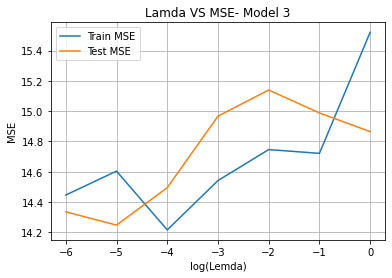

In [10]:
plt.grid()
plt.plot(np.log10(lemda),mse_train)
plt.plot(np.log10(lemda),mse_test)
plt.title('Lamda VS MSE- Model 3')
plt.ylabel('MSE')
plt.xlabel('log(Lemda)')
plt.legend(['Train MSE','Test MSE'])
plt.show()

### Calculating epochs vs MSE for best alpha 

In [13]:
index = np.argmin(mse_test)
mse_train = []
mse_test = []
num_folds = 10
epochs = 100
final_mse = []
inputs = np.concatenate((x_train, x_val), axis=0)[2:,:]
targets = np.concatenate((y_train, y_val), axis=0)[2:]
kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = Sequential()
  model.add(Dense(5,input_dim=4, activation='relu',kernel_regularizer=regularizers.l2(lemda[index])))
  model.add(Dense(10, activation='relu',kernel_regularizer=regularizers.l2(lemda[index])))
  model.add(Dense(5, activation='relu',kernel_regularizer=regularizers.l2(lemda[index])))
  model.add(Dense(1, activation='relu',kernel_regularizer=regularizers.l2(lemda[index])))
  model.get_layer(index=0)
  model.compile(loss='mse', optimizer='adam', metrics=['mse'])
  history_model1 = model.fit(inputs[train], targets[train], epochs=epochs,verbose=0,batch_size=10,validation_data = (inputs[test],targets[test]))    

  final_mse.append(history_model1.history['val_mse']);
  print(f'Score for fold {fold_no}: {final_mse[fold_no-1][epochs-1]}')
  # Increase fold number
  fold_no = fold_no + 1

ans3 = final_mse

Score for fold 1: 14.429184913635254
Score for fold 2: 11.58686637878418
Score for fold 3: 19.790346145629883
Score for fold 4: 13.928078651428223
Score for fold 5: 18.89752960205078
Score for fold 6: 26.69642448425293
Score for fold 7: 13.649839401245117
Score for fold 8: 10.522804260253906
Score for fold 9: 658.7369384765625
Score for fold 10: 13.764225006103516


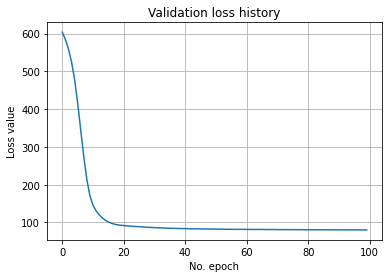

In [14]:
plt.grid()
plt.plot(np.mean(ans3, axis=0))
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Que: 4

## Overfit

In [26]:
model = Sequential()
model.add(Dense(5,input_dim=4, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='relu'))
model.get_layer(index=0)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history_model3 = model.fit(x_train, y_train, epochs=500, batch_size=10,verbose=0)

mse_train = model.evaluate(x_train,y_train,verbose=0)[1]
mse_test = model.evaluate(x_test,y_test,verbose=0)[1]

print("Training MSE: {}".format(mse_train))
print("Testing MSE : {}".format(mse_test))

Training MSE: 8.131474494934082
Testing MSE : 23.12409019470215


## Underfit

In [27]:
model = Sequential()
model.add(Dense(1,input_dim=4, activation='relu'))
model.get_layer(index=0)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history_model3 = model.fit(x_train, y_train, epochs=500, batch_size=10,verbose=0)

mse_train = model.evaluate(x_train,y_train,verbose=0)[1]
mse_test = model.evaluate(x_test,y_test,verbose=0)[1]

print("Training MSE: {}".format(mse_train))
print("Testing MSE : {}".format(mse_test))

Training MSE: 129.57273864746094
Testing MSE : 133.88209533691406
